In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [473]:
df=pd.read_csv("Obesity Classification.csv")
df.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB


In [4]:
df.Label.value_counts()

Label
Underweight      47
Normal Weight    29
Overweight       20
Obese            12
Name: count, dtype: int64

In [5]:
df.describe()

,ID,Age,Height,Weight,BMI
count,108.000000,108.000000,108.000000,108.000000,108.000000
mean,56.046296,46.555556,166.574074,59.490741,20.549074
std,31.917939,24.720620,27.873615,28.856233,7.583818
min,1.000000,11.000000,120.000000,10.000000,3.900000
25%,28.750000,27.000000,140.000000,35.000000,16.700000
50%,56.500000,42.500000,175.000000,55.000000,21.200000
75%,83.250000,59.250000,190.000000,85.000000,26.100000
max,110.000000,112.000000,210.000000,120.000000,37.200000


In [6]:
df.select_dtypes('number').columns

Index(['ID', 'Age', 'Height', 'Weight', 'BMI'], dtype='object')

<Axes: xlabel='Age'>

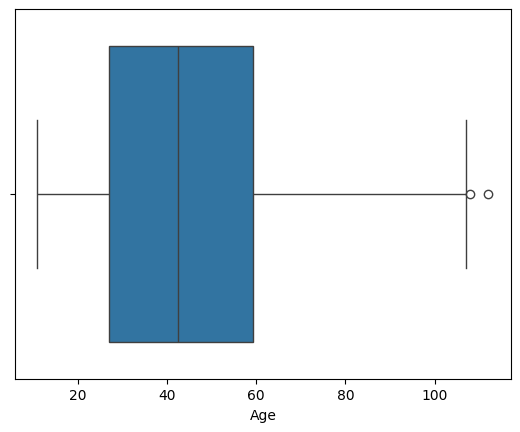

In [7]:

sns.boxplot(data=df,x='Age')

<Axes: xlabel='Height'>

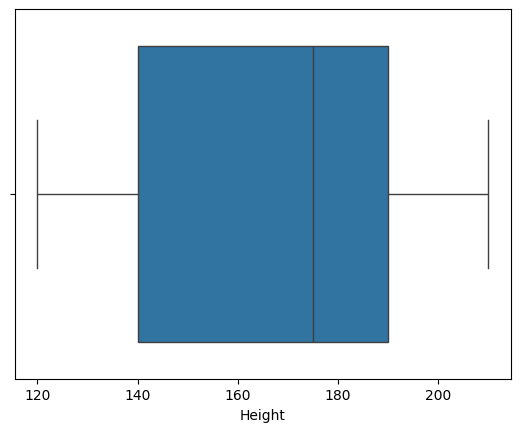

In [8]:
sns.boxplot(data=df,x='Height')

<Axes: xlabel='Weight'>

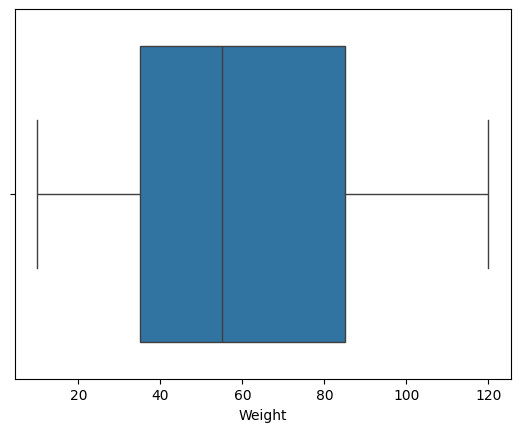

In [9]:
sns.boxplot(data=df,x='Weight')

<Axes: xlabel='BMI'>

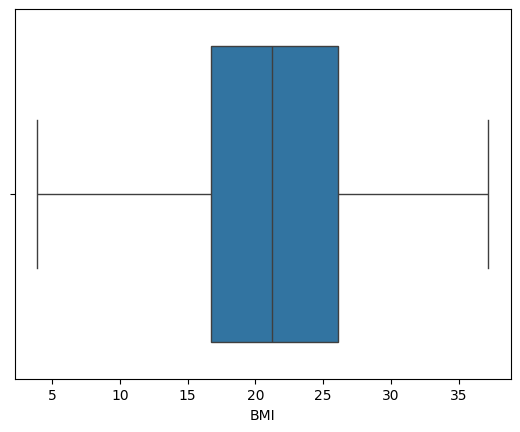

In [10]:
sns.boxplot(data=df,x='BMI')

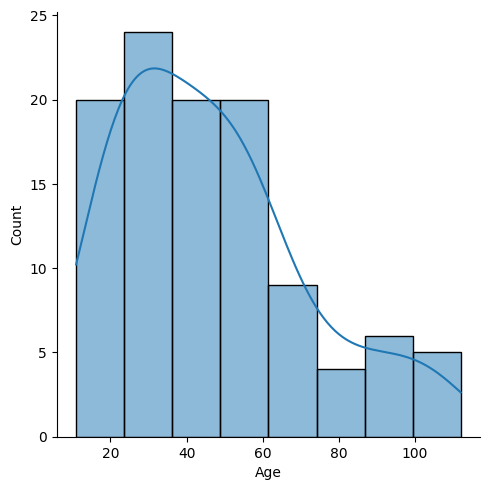

In [11]:
sns.displot(df['Age'],kde=True)

In [475]:
new_df=df.copy()

In [477]:
new_df.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


<Axes: xlabel='Height', ylabel='Weight'>

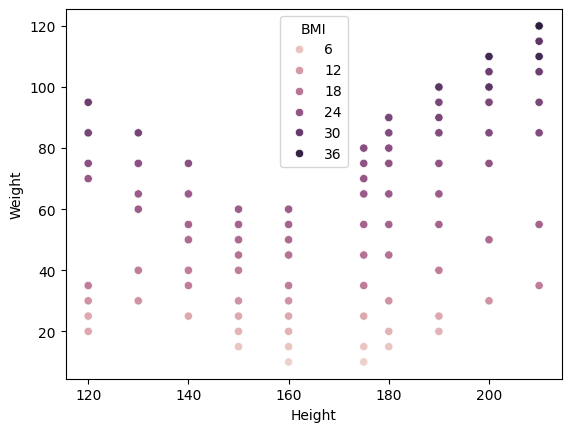

In [479]:
sns.scatterplot(x=df['Height'],y=df['Weight'],hue=df['BMI'])

In [481]:
df['Weight'].corr(df['BMI'])

np.float64(0.9728293471649844)

In [483]:
df.Gender.value_counts()

Gender
Male      56
Female    52
Name: count, dtype: int64

In [485]:
df.groupby(['Gender','Label']).size().reset_index().sort_values(0,axis=0)

,Gender,Label,0
1,Female,Overweight,8
0,Female,Normal Weight,12
5,Male,Overweight,12
4,Male,Obese,12
6,Male,Underweight,15
3,Male,Normal Weight,17
2,Female,Underweight,32


In [487]:
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OrdinalEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,confusion_matrix

In [489]:
X=new_df[['Gender','Age','Height','Weight','BMI']]
encoder=LabelEncoder()
new_df['Label']=encoder.fit_transform(df['Label'])

In [491]:
X

,Gender,Age,Height,Weight,BMI
0,Male,25,175,80,25.3
1,Female,30,160,60,22.5
2,Male,35,180,90,27.3
3,Female,40,150,50,20.0
4,Male,45,190,100,31.2
...,...,...,...,...,...
103,Male,11,175,10,3.9
104,Female,16,160,10,3.9
105,Male,21,180,15,5.6
106,Female,26,150,15,5.6


In [493]:
y=new_df['Label']

In [495]:
label_mapping = dict(zip(encoder.classes_, range(len(encoder.classes_))))
label_mapping


{'Normal Weight': 0, 'Obese': 1, 'Overweight': 2, 'Underweight': 3}

In [273]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

In [275]:
trf1=ColumnTransformer([
    ('imputer',SimpleImputer(strategy='most_frequent'),[0]), 
    ('knnimputer',KNNImputer(n_neighbors=3,weights='distance',copy=False,add_indicator=False),[1,2,3]), 
    
],remainder='passthrough')

In [277]:
trf2=ColumnTransformer([
    ('encoder',OrdinalEncoder(categories=[['Male', 'Female']]), [0])
],remainder='passthrough')

In [279]:
trf3=ColumnTransformer([
    ('scaler',StandardScaler(),[1,2,3])
],remainder='passthrough')

## Logistic Regression 

In [282]:
model1=LogisticRegression()
pipe1=Pipeline(steps=[
    ('trf1',trf1), 
    ('trf2',trf2), 
    ('trf3',trf3),    
    ('model1',model1)
])
pipe1.fit(X_train,y_train)

C:\Users\arshi\Downloads\Desktop\my project\NEW-VENV\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [0]),
                                                 ('knnimputer',
                                                  KNNImputer(copy=False,
                                                             n_neighbors=3,
                                                             weights='distance'),
                                                  [1, 2, 3])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder',
                                                  OrdinalEncoder(categories=[['Male',
                                                                              'Female']]),
                                                  [0])])),
                ('trf3',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  [1, 2, 3])])),
                ('model1', LogisticRegression())])

In [284]:
y_pred1=pipe1.predict(X_test)

In [286]:
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

0.8636363636363636
[[3 0 3 0]
 [0 3 0 0]
 [0 0 4 0]
 [0 0 0 9]]


In [427]:
param_grid_Log={
    'model1__C':[0.01,0.1,1,10,100], 
    'model1__penalty':['l2','l1'], 
    'model1__class_weight':['balanced',None],
    'model1__solver': ['lbfgs', 'liblinear'], 
    'model1__max_iter':[1000,1500,2000,2500]
}
grid_log=GridSearchCV(pipe1,param_grid=param_grid_Log,cv=5,scoring='accuracy')
grid_log.fit(X_train,y_train)

C:\Users\arshi\Downloads\Desktop\my project\NEW-VENV\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\arshi\Downloads\Desktop\my project\NEW-VENV\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('trf1',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('imputer',
                                                                         SimpleImputer(strategy='most_frequent'),
                                                                         [0]),
                                                                        ('knnimputer',
                                                                         KNNImputer(copy=False,
                                                                                    n_neighbors=3,
                                                                                    weights='distance'),
                                                                         [1, 2,
                                                                          3])])),
                                       ('trf2',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('encoder',
                                                                         OrdinalEncoder(categories=[['...
                                       ('trf3',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scaler',
                                                                         StandardScaler(),
                                                                         [1, 2,
                                                                          3])])),
                                       ('model1', LogisticRegression())]),
             param_grid={'model1__C': [0.01, 0.1, 1, 10, 100],
                         'model1__class_weight': ['balanced', None],
                         'model1__max_iter': [1000, 1500, 2000, 2500],
                         'model1__penalty': ['l2', 'l1'],
                         'model1__solver': ['lbfgs', 'liblinear']},
             scoring='accuracy')

In [428]:
grid_log.best_params_

{'model1__C': 10,
 'model1__class_weight': None,
 'model1__max_iter': 1000,
 'model1__penalty': 'l2',
 'model1__solver': 'lbfgs'}

In [431]:
grid_log.best_score_

np.float64(0.9882352941176471)

In [433]:
grid_log.score(X_train,y_train)

1.0

In [435]:
grid_log.score(X_test,y_test)

0.9545454545454546

In [437]:
pipe1_1=Pipeline(steps=[
    ('trf1',trf1), 
    ('trf2',trf2), 
    ('trf3',trf3), 
    ('model1',model1)
])

In [439]:
bagg1=BaggingClassifier(estimator=pipe1_1,n_estimators=50,random_state=42,n_jobs=-1)
bagg1.fit(X_train,y_train)

BaggingClassifier(estimator=Pipeline(steps=[('trf1',
                                             ColumnTransformer(remainder='passthrough',
                                                               transformers=[('imputer',
                                                                              SimpleImputer(strategy='most_frequent'),
                                                                              [0]),
                                                                             ('knnimputer',
                                                                              KNNImputer(copy=False,
                                                                                         n_neighbors=3,
                                                                                         weights='distance'),
                                                                              [1,
                                                                               2,
                                                                               3])])),
                                            ('trf2',
                                             ColumnTransformer(remainder='passthrough',
                                                               transformers=[('encoder',
                                                                              OrdinalEncoder(categories=[['Male',
                                                                                                          'Female']]),
                                                                              [0])])),
                                            ('trf3',
                                             ColumnTransformer(remainder='passthrough',
                                                               transformers=[('scaler',
                                                                              StandardScaler(),
                                                                              [1,
                                                                               2,
                                                                               3])])),
                                            ('model1', LogisticRegression())]),
                  n_estimators=50, n_jobs=-1, random_state=42)

In [441]:
bagg1.score(X_test,y_test)

0.8636363636363636

In [443]:
bagg1.score(X_train,y_train)

0.9418604651162791

In [445]:
# param_grid_Log_bag={
#     'n_estimators':[40,60,80,100], 
#     'max_samples': [0.5, 0.8, 1.0],
#     'max_features': [0.5, 0.8, 1.0],    
#     'bootstrap': [True, False]
# }
# grid_log_bag=GridSearchCV(bagg1,param_grid_Log_bag,cv=5,scoring='accuracy')
# grid_log_bag.fit(X_train,y_train)

## Decision Tree

In [80]:
model2=DecisionTreeClassifier()
pipe2=Pipeline(steps=[
    ('trf1',trf1), 
    ('trf2',trf2),
    ('model2',model2)
])
pipe2.fit(X_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [0]),
                                                 ('knnimputer',
                                                  KNNImputer(copy=False,
                                                             n_neighbors=3,
                                                             weights='distance'),
                                                  [1, 2, 3, 4])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder',
                                                  OrdinalEncoder(categories=[['Male',
                                                                              'Female']]),
                                                  [0])])),
                ('model2', DecisionTreeClassifier())])

In [82]:
y_pred2=pipe2.predict(X_test)

In [84]:
accuracy_score(y_test,y_pred2)

0.9545454545454546

In [86]:
pipe2.score(X_train,y_train)

1.0

In [107]:
param_grid_DT={
    'model2__max_depth':[3,4,5], 
    'model2__criterion':['gini','entropy'], 
    'model2__min_samples_split': [2, 5, 10], 
    'model2__min_samples_leaf': [1, 2, 4],
    'model2__max_features': [ 'sqrt', 'log2', None],
    'model2__class_weight': ['balanced', None]
}
grid_DT=GridSearchCV(pipe2,param_grid=param_grid_DT,cv=5,scoring='accuracy')
grid_DT.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('trf1',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('imputer',
                                                                         SimpleImputer(strategy='most_frequent'),
                                                                         [0]),
                                                                        ('knnimputer',
                                                                         KNNImputer(copy=False,
                                                                                    n_neighbors=3,
                                                                                    weights='distance'),
                                                                         [1, 2,
                                                                          3,
                                                                          4])])),
                                       ('trf2',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('encoder',
                                                                         OrdinalEncoder(categories=[['Male',
                                                                                                     'Female']]),
                                                                         [0])])),
                                       ('model2', DecisionTreeClassifier())]),
             param_grid={'model2__class_weight': ['balanced', None],
                         'model2__criterion': ['gini', 'entropy'],
                         'model2__max_depth': [3, 4, 5],
                         'model2__max_features': ['sqrt', 'log2', None],
                         'model2__min_samples_leaf': [1, 2, 4],
                         'model2__min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [109]:
grid_DT.score(X_test,y_test)

0.9545454545454546

In [310]:
bagg2=BaggingClassifier(estimator=pipe2,n_estimators=50,random_state=42,n_jobs=-1)
bagg2.fit(X_train,y_train)

BaggingClassifier(estimator=Pipeline(steps=[('trf1',
                                             ColumnTransformer(remainder='passthrough',
                                                               transformers=[('imputer',
                                                                              SimpleImputer(strategy='most_frequent'),
                                                                              [0]),
                                                                             ('knnimputer',
                                                                              KNNImputer(copy=False,
                                                                                         n_neighbors=3,
                                                                                         weights='distance'),
                                                                              [1,
                                                                               2,
                                                                               3,
                                                                               4])])),
                                            ('trf2',
                                             ColumnTransformer(remainder='passthrough',
                                                               transformers=[('encoder',
                                                                              OrdinalEncoder(categories=[['Male',
                                                                                                          'Female']]),
                                                                              [0])])),
                                            ('model2',
                                             DecisionTreeClassifier())]),
                  n_estimators=50, n_jobs=-1, random_state=42)

In [312]:
bagg2.score(X_test,y_test)

0.9545454545454546

In [322]:
# param_grid_DT_bag={
#     'n_estimators':[40,60,80,100], 
#     'max_samples': [0.5, 0.8, 1.0],
#     'max_features': [0.5, 0.8, 1.0],    
#     'bootstrap': [True, False]
# }
# grid_DT_bag=GridSearchCV(bagg2,param_grid_DT_bag,cv=5,scoring='accuracy')
# grid_DT_bag.fit(X_train,y_train)

## SVM

In [94]:
model3=SVC()
pipe3=Pipeline(steps=[
    ('trf1',trf1), 
    ('trf2',trf2), 
    ('trf3',trf3), 
    ('model3',model3)
])
pipe3.fit(X_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [0]),
                                                 ('knnimputer',
                                                  KNNImputer(copy=False,
                                                             n_neighbors=3,
                                                             weights='distance'),
                                                  [1, 2, 3, 4])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder',
                                                  OrdinalEncoder(categories=[['Male',
                                                                              'Female']]),
                                                  [0])])),
                ('trf3',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  [1, 2, 3, 4])])),
                ('model3', SVC())])

In [96]:
pipe3.score(X_test,y_test)

0.9090909090909091

In [98]:
pipe3.score(X_train,y_train)

0.9534883720930233

In [105]:
param_grid_SVC={
    'model3__C':[0.01,0.1,1,10,100], 
    'model3__kernel':['linear','rbf','poly','sigmoid'],
    'model3__degree':[2,3,4], 
    'model3__class_weight':['balanced',None], 
    'model3__gamma': ['scale', 'auto', 0.001, 0.01]
}
grid_SVC=GridSearchCV(pipe3,param_grid=param_grid_SVC,cv=5,scoring='accuracy')
grid_SVC.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('trf1',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('imputer',
                                                                         SimpleImputer(strategy='most_frequent'),
                                                                         [0]),
                                                                        ('knnimputer',
                                                                         KNNImputer(copy=False,
                                                                                    n_neighbors=3,
                                                                                    weights='distance'),
                                                                         [1, 2,
                                                                          3,
                                                                          4])])),
                                       ('trf2',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('encoder',
                                                                         OrdinalEncoder(categories=[...
                                                                         [0])])),
                                       ('trf3',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scaler',
                                                                         StandardScaler(),
                                                                         [1, 2,
                                                                          3,
                                                                          4])])),
                                       ('model3', SVC())]),
             param_grid={'model3__C': [0.01, 0.1, 1, 10, 100],
                         'model3__class_weight': ['balanced', None],
                         'model3__degree': [2, 3, 4],
                         'model3__gamma': ['scale', 'auto', 0.001, 0.01],
                         'model3__kernel': ['linear', 'rbf', 'poly',
                                            'sigmoid']},
             scoring='accuracy')

In [ ]:
grid_SVC.score(X_test,y_test)

In [ ]:
grid_SVC.score(X_train,y_train)

In [316]:
bagg3=BaggingClassifier(estimator=pipe3,n_estimators=50,random_state=42,n_jobs=-1)
bagg3.fit(X_train,y_train)

BaggingClassifier(estimator=Pipeline(steps=[('trf1',
                                             ColumnTransformer(remainder='passthrough',
                                                               transformers=[('imputer',
                                                                              SimpleImputer(strategy='most_frequent'),
                                                                              [0]),
                                                                             ('knnimputer',
                                                                              KNNImputer(copy=False,
                                                                                         n_neighbors=3,
                                                                                         weights='distance'),
                                                                              [1,
                                                                               2,
                                                                               3,
                                                                               4])])),
                                            ('trf2',
                                             ColumnTransformer(remainder='passthrough',
                                                               transformers=[('encoder',
                                                                              OrdinalEncoder(categories=[['Male',
                                                                                                          'Female']]),
                                                                              [0])])),
                                            ('trf3',
                                             ColumnTransformer(remainder='passthrough',
                                                               transformers=[('scaler',
                                                                              StandardScaler(),
                                                                              [1,
                                                                               2,
                                                                               3,
                                                                               4])])),
                                            ('model3', SVC())]),
                  n_estimators=50, n_jobs=-1, random_state=42)

In [318]:
bagg3.score(X_test,y_test)

0.9090909090909091

In [320]:
# param_grid_SVM_bag={
#     'n_estimators':[40,60,80,100], 
#     'max_samples': [0.5, 0.8, 1.0],
#     'max_features': [0.5, 0.8, 1.0],    
#     'bootstrap': [True, False]
# }
# grid_SVM_bag=GridSearchCV(bagg3,param_grid_SVM_bag,cv=5,scoring='accuracy')
# grid_SVM_bag.fit(X_train,y_train)

## KNN

In [111]:
model4=KNeighborsClassifier()
pipe4=Pipeline(steps=[
    ('trf1',trf1), 
    ('trf2',trf2), 
    ('trf3',trf3), 
    ('model4',model4)
])
pipe4.fit(X_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [0]),
                                                 ('knnimputer',
                                                  KNNImputer(copy=False,
                                                             n_neighbors=3,
                                                             weights='distance'),
                                                  [1, 2, 3, 4])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder',
                                                  OrdinalEncoder(categories=[['Male',
                                                                              'Female']]),
                                                  [0])])),
                ('trf3',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  [1, 2, 3, 4])])),
                ('model4', KNeighborsClassifier())])

In [113]:
pipe4.score(X_test,y_test)

0.8181818181818182

In [115]:
pipe4.score(X_train,y_train)

0.8837209302325582

In [117]:
param_grid_KNN={
    'model4__n_neighbors': [3, 5, 7, 9, 11], 
    'model4__weights': ['uniform', 'distance'], 
    'model4__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
grid_KNN=GridSearchCV(pipe4,param_grid=param_grid_KNN,cv=5,scoring='accuracy')
grid_KNN.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('trf1',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('imputer',
                                                                         SimpleImputer(strategy='most_frequent'),
                                                                         [0]),
                                                                        ('knnimputer',
                                                                         KNNImputer(copy=False,
                                                                                    n_neighbors=3,
                                                                                    weights='distance'),
                                                                         [1, 2,
                                                                          3,
                                                                          4])])),
                                       ('trf2',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('encoder',
                                                                         OrdinalEncoder(categories=[['Male',
                                                                                                     'Female']]),
                                                                         [0])])),
                                       ('trf3',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scaler',
                                                                         StandardScaler(),
                                                                         [1, 2,
                                                                          3,
                                                                          4])])),
                                       ('model4', KNeighborsClassifier())]),
             param_grid={'model4__algorithm': ['auto', 'ball_tree', 'kd_tree',
                                               'brute'],
                         'model4__n_neighbors': [3, 5, 7, 9, 11],
                         'model4__weights': ['uniform', 'distance']},
             scoring='accuracy')

In [119]:
grid_KNN.score(X_test,y_test)

0.8636363636363636

In [324]:
bagg4=BaggingClassifier(estimator=pipe4,n_estimators=50,random_state=42,n_jobs=-1)
bagg4.fit(X_train,y_train)

BaggingClassifier(estimator=Pipeline(steps=[('trf1',
                                             ColumnTransformer(remainder='passthrough',
                                                               transformers=[('imputer',
                                                                              SimpleImputer(strategy='most_frequent'),
                                                                              [0]),
                                                                             ('knnimputer',
                                                                              KNNImputer(copy=False,
                                                                                         n_neighbors=3,
                                                                                         weights='distance'),
                                                                              [1,
                                                                               2,
                                                                               3,
                                                                               4])])),
                                            ('trf2',
                                             ColumnTransformer(remainder='passthrough',
                                                               transformers=[('encoder',
                                                                              OrdinalEncoder(categories=[['Male',
                                                                                                          'Female']]),
                                                                              [0])])),
                                            ('trf3',
                                             ColumnTransformer(remainder='passthrough',
                                                               transformers=[('scaler',
                                                                              StandardScaler(),
                                                                              [1,
                                                                               2,
                                                                               3,
                                                                               4])])),
                                            ('model4',
                                             KNeighborsClassifier())]),
                  n_estimators=50, n_jobs=-1, random_state=42)

In [326]:
bagg4.score(X_test,y_test)

0.9090909090909091

In [345]:
# param_grid_KNN_bag={
#     'n_estimators':[40,60,80,100], 
#     'max_samples': [0.5, 0.8, 1.0],
#     'max_features': [0.5, 0.8, 1.0],    
#     'bootstrap': [True, False]
# }
# grid_KNN_bag=GridSearchCV(bagg4,param_grid_KNN_bag,cv=5,scoring='accuracy')
# grid_KNN_bag.fit(X_train,y_train)

## Naive Bayes

### GaussianNB

In [330]:
model5=GaussianNB()
pipe5=Pipeline(steps=[
    ('trf1',trf1), 
    ('trf2',trf2), 
    ('trf3',trf3), 
    ('model5',model5)
])
pipe5.fit(X_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [0]),
                                                 ('knnimputer',
                                                  KNNImputer(copy=False,
                                                             n_neighbors=3,
                                                             weights='distance'),
                                                  [1, 2, 3])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder',
                                                  OrdinalEncoder(categories=[['Male',
                                                                              'Female']]),
                                                  [0])])),
                ('trf3',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  [1, 2, 3])])),
                ('model5', GaussianNB())])

In [332]:
pipe5.score(X_test,y_test)

0.9545454545454546

In [337]:
param_grid_GNB={
    'model5__var_smoothing': [1e-10, 1e-9, 1e-8, 1e-7, 1e-6]
}
grid_GNB=GridSearchCV(pipe5,param_grid_GNB,cv=5,scoring='accuracy')
grid_GNB.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('trf1',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('imputer',
                                                                         SimpleImputer(strategy='most_frequent'),
                                                                         [0]),
                                                                        ('knnimputer',
                                                                         KNNImputer(copy=False,
                                                                                    n_neighbors=3,
                                                                                    weights='distance'),
                                                                         [1, 2,
                                                                          3])])),
                                       ('trf2',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('encoder',
                                                                         OrdinalEncoder(categories=[['Male',
                                                                                                     'Female']]),
                                                                         [0])])),
                                       ('trf3',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scaler',
                                                                         StandardScaler(),
                                                                         [1, 2,
                                                                          3])])),
                                       ('model5', GaussianNB())]),
             param_grid={'model5__var_smoothing': [1e-10, 1e-09, 1e-08, 1e-07,
                                                   1e-06]},
             scoring='accuracy')

In [339]:
grid_GNB.score(X_test,y_test)

0.9545454545454546

In [341]:
bagg5=BaggingClassifier(pipe5,n_estimators=50,n_jobs=-1)
bagg5.fit(X_train,y_train)

BaggingClassifier(estimator=Pipeline(steps=[('trf1',
                                             ColumnTransformer(remainder='passthrough',
                                                               transformers=[('imputer',
                                                                              SimpleImputer(strategy='most_frequent'),
                                                                              [0]),
                                                                             ('knnimputer',
                                                                              KNNImputer(copy=False,
                                                                                         n_neighbors=3,
                                                                                         weights='distance'),
                                                                              [1,
                                                                               2,
                                                                               3])])),
                                            ('trf2',
                                             ColumnTransformer(remainder='passthrough',
                                                               transformers=[('encoder',
                                                                              OrdinalEncoder(categories=[['Male',
                                                                                                          'Female']]),
                                                                              [0])])),
                                            ('trf3',
                                             ColumnTransformer(remainder='passthrough',
                                                               transformers=[('scaler',
                                                                              StandardScaler(),
                                                                              [1,
                                                                               2,
                                                                               3])])),
                                            ('model5', GaussianNB())]),
                  n_estimators=50, n_jobs=-1)

In [343]:
bagg5.score(X_test,y_test)

0.9545454545454546

In [347]:
# param_grid_GNB_bag={
#     'n_estimators':[40,60,80,100], 
#     'max_samples': [0.5, 0.8, 1.0],
#     'max_features': [0.5, 0.8, 1.0],    
#     'bootstrap': [True, False]
# }
# grid_GNB_bag=GridSearchCV(bagg5,param_grid_GNB_bag,cv=5,scoring='accuracy')
# grid_GNB_bag.fit(X_train,y_train)

### MultinomialNB

In [353]:
trf4=ColumnTransformer([
    ('scaler',MinMaxScaler(),[1,2,3])
],remainder='passthrough')

In [355]:
model6=MultinomialNB()
pipe6=Pipeline(steps=[
    ('trf1',trf1), 
    ('trf2',trf2), 
    ('trf4',trf4), 
    ('model6',model6)
])
pipe6.fit(X_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [0]),
                                                 ('knnimputer',
                                                  KNNImputer(copy=False,
                                                             n_neighbors=3,
                                                             weights='distance'),
                                                  [1, 2, 3])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder',
                                                  OrdinalEncoder(categories=[['Male',
                                                                              'Female']]),
                                                  [0])])),
                ('trf4',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', MinMaxScaler(),
                                                  [1, 2, 3])])),
                ('model6', MultinomialNB())])

In [357]:
pipe6.score(X_test,y_test)

0.5

In [359]:
param_grid_MNB={
    'model6__alpha': [0.001, 0.01, 0.1, 1, 10, 100],
    'model6__fit_prior': [True, False]
}
grid_MNB=GridSearchCV(pipe6,param_grid_MNB,cv=5,scoring='accuracy')
grid_MNB.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('trf1',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('imputer',
                                                                         SimpleImputer(strategy='most_frequent'),
                                                                         [0]),
                                                                        ('knnimputer',
                                                                         KNNImputer(copy=False,
                                                                                    n_neighbors=3,
                                                                                    weights='distance'),
                                                                         [1, 2,
                                                                          3])])),
                                       ('trf2',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('encoder',
                                                                         OrdinalEncoder(categories=[['Male',
                                                                                                     'Female']]),
                                                                         [0])])),
                                       ('trf4',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scaler',
                                                                         MinMaxScaler(),
                                                                         [1, 2,
                                                                          3])])),
                                       ('model6', MultinomialNB())]),
             param_grid={'model6__alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                         'model6__fit_prior': [True, False]},
             scoring='accuracy')

In [361]:
grid_MNB.score(X_test,y_test)

0.5

## RandomForest

In [365]:
model7=RandomForestClassifier()
pipe7=Pipeline(steps=[
    ('trf1',trf1), 
    ('trf2',trf2), 
    ('trf3',trf3), 
    ('model7',model7)
])
pipe7.fit(X_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [0]),
                                                 ('knnimputer',
                                                  KNNImputer(copy=False,
                                                             n_neighbors=3,
                                                             weights='distance'),
                                                  [1, 2, 3])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder',
                                                  OrdinalEncoder(categories=[['Male',
                                                                              'Female']]),
                                                  [0])])),
                ('trf3',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  [1, 2, 3])])),
                ('model7', RandomForestClassifier())])

In [367]:
pipe7.score(X_test,y_test)

1.0

In [369]:
pipe7.score(X_train,y_train)

1.0

In [373]:
param_grid_RF={
    'model7__n_estimators': [50,100,150],
    'model7__max_depth': [10, 20, 30, None],
    'model7__min_samples_split': [2, 5, 10],
    'model7__min_samples_leaf': [1, 2, 4],
    'model7__max_features': ['sqrt', 'log2', None],
    'model7__bootstrap': [True, False]
}
grid_RF=GridSearchCV(pipe7,param_grid_RF,cv=5,n_jobs=-1,scoring='accuracy')
grid_RF.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('trf1',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('imputer',
                                                                         SimpleImputer(strategy='most_frequent'),
                                                                         [0]),
                                                                        ('knnimputer',
                                                                         KNNImputer(copy=False,
                                                                                    n_neighbors=3,
                                                                                    weights='distance'),
                                                                         [1, 2,
                                                                          3])])),
                                       ('trf2',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('encoder',
                                                                         OrdinalEncoder(categories=[['...
                                                          transformers=[('scaler',
                                                                         StandardScaler(),
                                                                         [1, 2,
                                                                          3])])),
                                       ('model7', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'model7__bootstrap': [True, False],
                         'model7__max_depth': [10, 20, 30, None],
                         'model7__max_features': ['sqrt', 'log2', None],
                         'model7__min_samples_leaf': [1, 2, 4],
                         'model7__min_samples_split': [2, 5, 10],
                         'model7__n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [375]:
grid_RF.best_score_

np.float64(0.9882352941176471)

In [377]:
grid_RF.best_params_

{'model7__bootstrap': True,
 'model7__max_depth': 10,
 'model7__max_features': 'sqrt',
 'model7__min_samples_leaf': 4,
 'model7__min_samples_split': 5,
 'model7__n_estimators': 50}

In [379]:
grid_RF.score(X_test,y_test)

0.9545454545454546

In [381]:
grid_RF.score(X_train,y_train)

1.0

## Predicting with new values

In [417]:
X_test.iloc[1]

Gender    Male
Age         48
Height     200
Weight     100
BMI       31.2
Name: 16, dtype: object

In [419]:
y_test.iloc[1]

np.int64(1)

In [497]:
grid_RF.predict([['Male',48,200,100,31.2]])[0]

C:\Users\arshi\Downloads\Desktop\my project\NEW-VENV\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\arshi\Downloads\Desktop\my project\NEW-VENV\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNNImputer was fitted with feature names
  warnings.warn(


np.int64(1)

In [499]:
def pred(arr): 
    val=grid_RF.predict(arr)
    for key,vals in label_mapping.items(): 
        if val[0]==vals:
            return key
            

In [503]:
pred([['Male',48,200,100,31.2]])

C:\Users\arshi\Downloads\Desktop\my project\NEW-VENV\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\arshi\Downloads\Desktop\my project\NEW-VENV\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNNImputer was fitted with feature names
  warnings.warn(


'Obese'

# Pickling the model

In [385]:
import pickle as pkl 

In [387]:
with open('model_RandomForest.pkl','wb') as file : 
    pkl.dump(grid_RF,file)

In [505]:
with open('model_KNN.pkl','wb') as file : 
    pkl.dump(grid_KNN,file)

In [507]:
with open('model_RFpipe.pkl','wb') as file : 
    pkl.dump(pipe7,file)